# **Laptop Price Dataset**

## **Introduction**

The **Laptop Price Dataset** is designed to analyze various attributes of laptops to understand how these features influence their prices. Through **Exploratory Data Analysis (EDA)**, we will uncover patterns, relationships, and anomalies within the data that could be valuable for building predictive models and extracting insights.


### **Objectives of EDA**
1. **Understand Data Structure:**
   - Inspecting the dataset’s size, structure, and data types.
   - Identifying numerical and categorical features.

2. **Handle Missing Values & Duplicates:**
   - Checking for missing values and their proportion.
   - Identifying and removing duplicate entries if present.

3. **Data Distribution & Summary Statistics:**
   - Analyzing the distribution of numerical features (e.g., `Price`, `Weight`, `Inches`).
   - Analyzing the frequency distribution of categorical features (e.g., `Company`, `TypeName`, `OpSys`).

4. **Outlier Detection & Treatment:**
   - Identifying outliers in numerical columns using statistical methods like IQR.
   - Treating outliers by capping or replacing them with appropriate values.

5. **Feature Correlation Analysis:**
   - Examining relationships between numerical features using a correlation matrix.
   - Understanding how features relate to the target variable (`Price`).

6. **Categorical Feature Encoding:**
   - Preparing categorical features for modeling through techniques like **One-Hot Encoding** or **Label Encoding**.

### **Outcome of EDA:**
The EDA process will prepare a **cleaned and transformed dataset**, ready for building machine learning models to predict laptop prices accurately. Additionally, it will provide valuable insights into the most influential factors affecting laptop prices.

### **Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### **Importing dataset**

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Projects/Laptop_price.csv')

### **Analysing top 10 data**

In [3]:
df.head(10)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


### **Checking information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


### **Checking null values**

In [5]:
df.isna().sum()

,0
Brand,0
Processor_Speed,0
RAM_Size,0
Storage_Capacity,0
Screen_Size,0
Weight,0
Price,0


### **Checking duplicate rows**

In [6]:
df.duplicated().sum()

0

### **Boxplot**

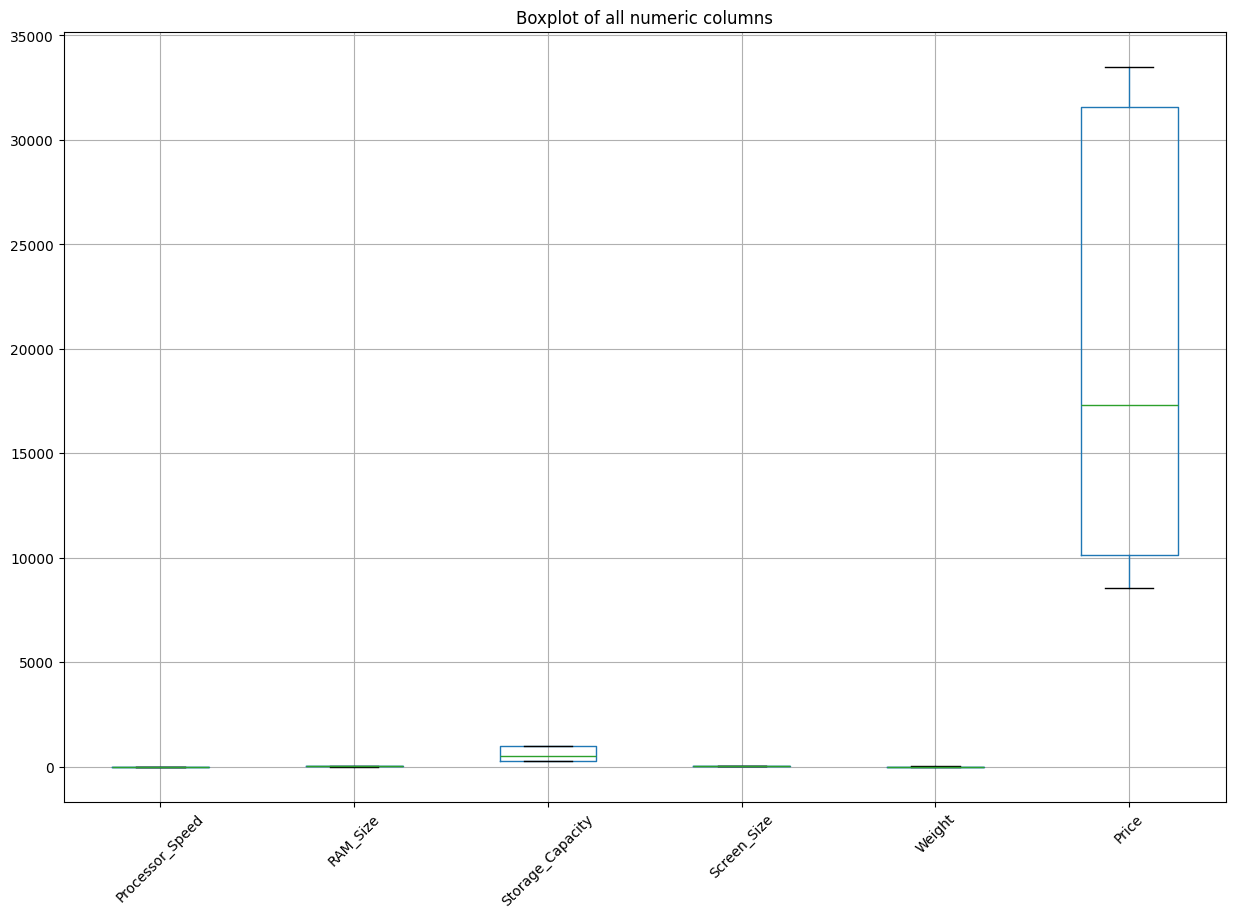

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,10))
df[numeric_cols].boxplot()
plt.title('Boxplot of all numeric columns')
plt.xticks(rotation=45)
plt.show()

## **Statistical Analysis**

### Covariance

In [8]:
df.cov(numeric_only=True)

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,0.535526,0.172018,-1.550023e+01,-0.016760,-0.034626,-3.492415e+02
RAM_Size,0.172018,120.750751,7.271271e+00,-0.674874,-0.241687,6.329435e+03
Storage_Capacity,-15.500231,7.271271,9.824370e+04,-14.736013,11.226917,2.942055e+06
Screen_Size,-0.016760,-0.674874,-1.473601e+01,2.910033,0.032513,-4.290565e+02
Weight,-0.034626,-0.241687,1.122692e+01,0.032513,0.750894,3.131241e+02
Price,-349.241464,6329.434895,2.942055e+06,-429.056531,313.124142,8.847406e+07


### Correlation

In [9]:
df.corr(numeric_only=True)

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


### Heatmap

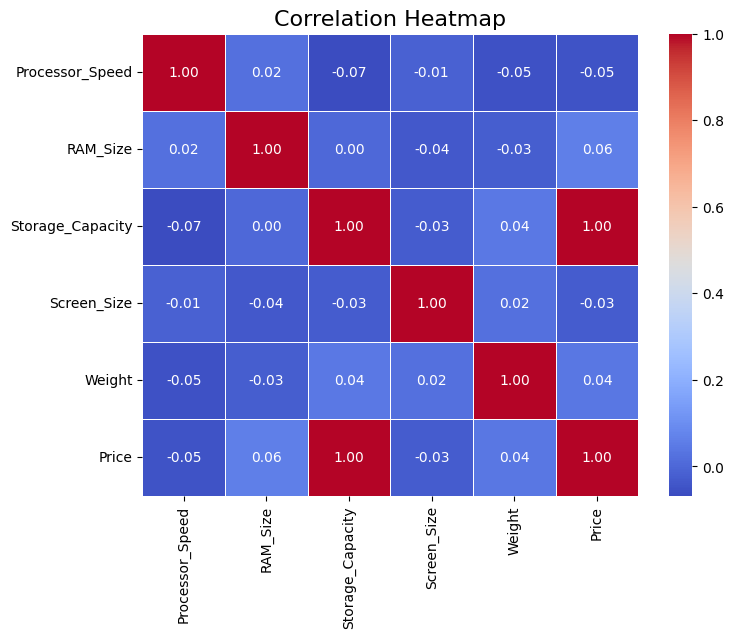

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True) , annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Describe

In [11]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


### **Bar Chart**

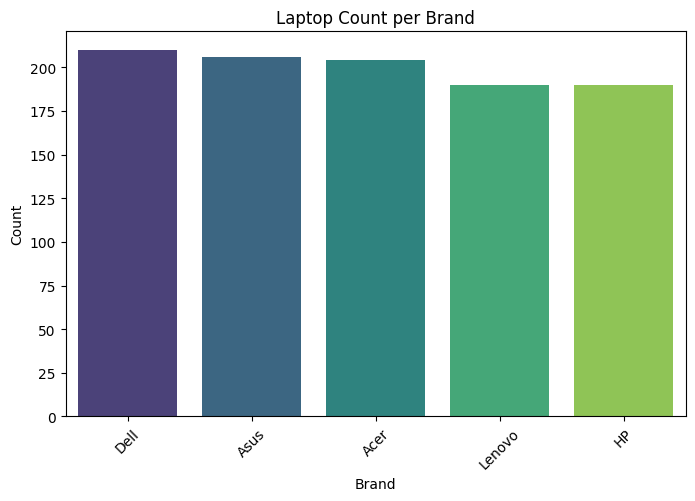

In [12]:
plt.figure(figsize=(8, 5))
brand_counts = df["Brand"].value_counts()
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")
plt.title("Laptop Count per Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### **Histogram**

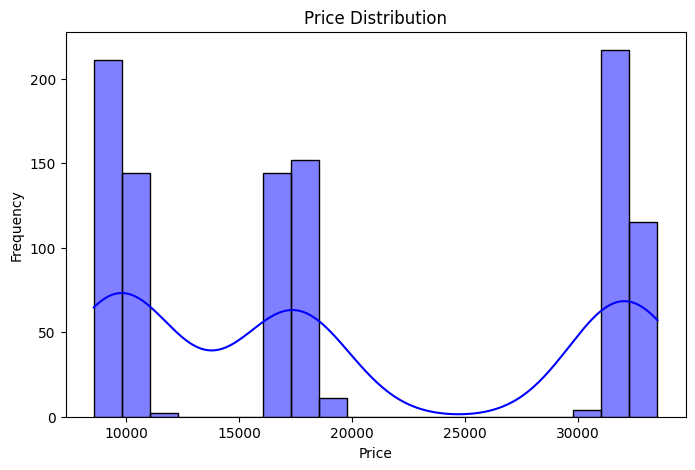

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=20, kde=True, color="blue")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### **Pie Chart**

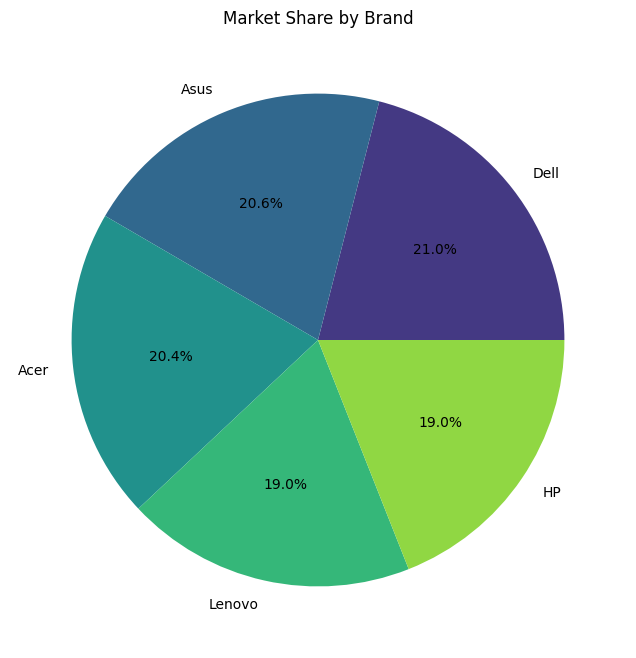

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(brand_counts)))
plt.title("Market Share by Brand")
plt.show()

### **Line Chart**

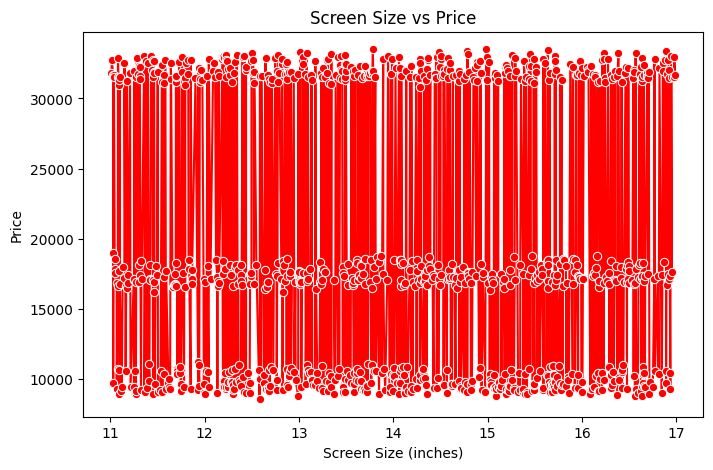

In [15]:
plt.figure(figsize=(8, 5))
df_sorted = df.sort_values(by="Screen_Size")
sns.lineplot(x=df_sorted["Screen_Size"], y=df_sorted["Price"], marker="o", color="red")
plt.title("Screen Size vs Price")
plt.xlabel("Screen Size (inches)")
plt.ylabel("Price")
plt.show()

### **One-Hot encoding using ColumnTransformer**

In [16]:
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'),
         ['Brand'],)],remainder='passthrough')

transformed_data = transformer.fit_transform(df)

feature_names = list(transformer.named_transformers_['onehot'].get_feature_names_out(['Brand'])) + list(df.columns.drop('Brand'))

transformed_df = pd.DataFrame(transformed_data, columns=feature_names)

print(transformed_df.head())

   Brand_Asus  Brand_Dell  Brand_HP  Brand_Lenovo  Processor_Speed  RAM_Size  \
0         1.0         0.0       0.0           0.0         3.830296      16.0   
1         0.0         0.0       0.0           0.0         2.912833       4.0   
2         0.0         0.0       0.0           1.0         3.241627       4.0   
3         0.0         0.0       0.0           0.0         3.806248      16.0   
4         0.0         0.0       0.0           0.0         3.268097      32.0   

   Storage_Capacity  Screen_Size    Weight         Price  
0             512.0    11.185147  2.641094  17395.093065  
1            1000.0    11.311372  3.260012  31607.605919  
2             256.0    11.853023  2.029061   9291.023542  
3             512.0    12.280360  4.573865  17436.728334  
4            1000.0    14.990877  4.193472  32917.990718  


### **Selecting x and y**

In [17]:
x = transformed_df.drop('Price',axis=1)
y = transformed_df['Price']

In [18]:
x.head()

,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
0,1.0,0.0,0.0,0.0,3.830296,16.0,512.0,11.185147,2.641094
1,0.0,0.0,0.0,0.0,2.912833,4.0,1000.0,11.311372,3.260012
2,0.0,0.0,0.0,1.0,3.241627,4.0,256.0,11.853023,2.029061
3,0.0,0.0,0.0,0.0,3.806248,16.0,512.0,12.280360,4.573865
4,0.0,0.0,0.0,0.0,3.268097,32.0,1000.0,14.990877,4.193472


In [19]:
y.head()

,Price
0,17395.093065
1,31607.605919
2,9291.023542
3,17436.728334
4,32917.990718


### **Scatterplot**

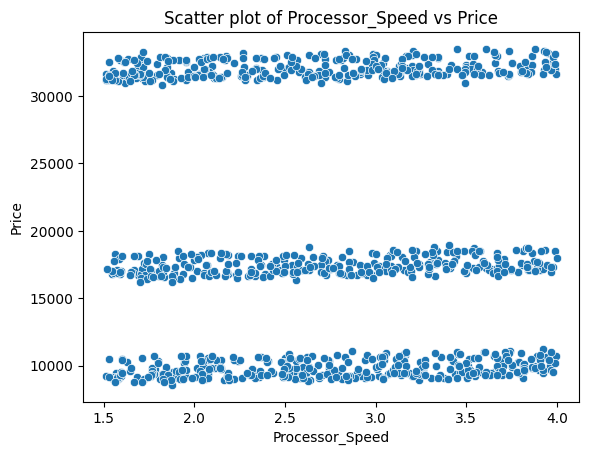

In [20]:
sns.scatterplot(df,x='Processor_Speed', y=y)
plt.xlabel('Processor_Speed')
plt.ylabel('Price')
plt.title(f'Scatter plot of Processor_Speed vs Price')
plt.show()

### **Train Test Splitting**

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### **Predicting Laptop Price using Linear Regression**

In [22]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### **Checking Accuracy**

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score=r2_score(y_test,y_pred)
print("r2 score is ",score*100,"%")

Mean Absolute Error: 146.22493703699593
Mean Squared Error: 32304.737335988255
Root Mean Squared Error: 179.7351866941703
r2 score is  99.96442074396728 %


### **Regression Analysis**

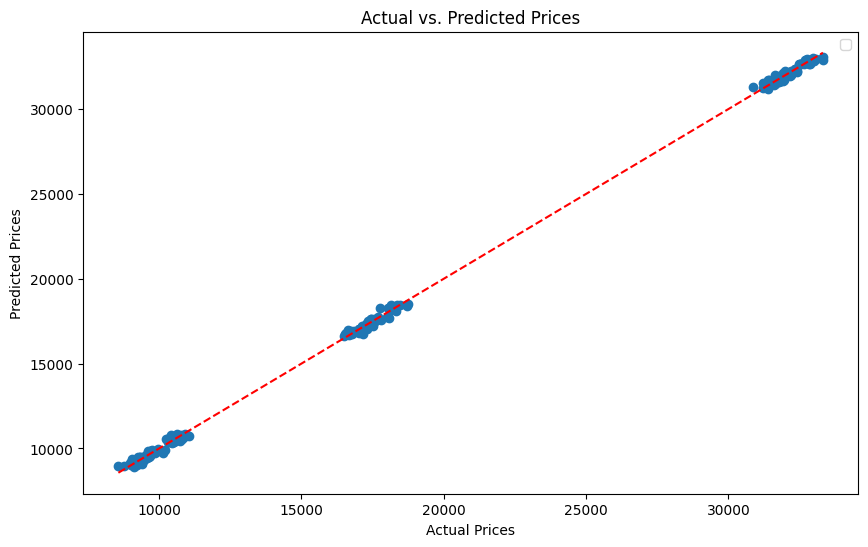

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.legend()
plt.show()

## **Summary**

The EDA process aims to explore and prepare the **Laptop Price Dataset** for predictive modeling. It includes several steps:


### **1. Data Understanding & Initial Analysis**
- **Loaded Dataset:** Successfully loaded using Pandas.
- **Data Inspection:** Displayed top 10 rows and dataset information (`df.info()`).
- **Missing Values & Duplicates:** No missing values or duplicate rows were found.


### **2. Statistical & Graphical Analysis**
- **Statistical Measures:**
  - Covariance and Correlation matrices were generated to identify relationships between numerical features.
  - Summary statistics (`df.describe()`) were calculated.

- **Visualizations:**  
  - **Boxplots:** Visualized potential outliers in numerical columns.
  - **Heatmap:** Displayed correlation between numerical features.
  - **Bar Chart:** Showed the count of laptops by brand.
  - **Histogram:** Illustrated the distribution of laptop prices.
  - **Pie Chart:** Depicted market share by brand.
  - **Line Chart:** Displayed the relationship between screen size and price.
  - **Scatter Plot:** Visualized `Processor Speed` against `Price`.


### **3. Data Preprocessing**
- **Categorical Encoding:**
  - One-Hot Encoding applied to the `Brand` column using `ColumnTransformer`.
  - `drop='first'` used to avoid the dummy variable trap.

- **Feature Selection:**
  - `X`: All columns except `Price`.
  - `y`: The target variable (`Price`).

- **Train-Test Split:**
  - Split the data into training and testing sets with a ratio of 80:20.



### **4. Model Building & Evaluation**
- **Model Used:** Linear Regression.
- **Performance Metrics:**
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - R² Score (Model Accuracy)
- **Actual vs. Predicted Plot:** Scatter plot showing the model's prediction performance.


